In [7]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('style.csv')  # Replace with your dataset path
print(df.head())

# Example dataset columns: ['id', 'image', 'caption', 'category', 'color', 'timestamp']

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName Unnamed: 10  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt         NaN   
1  2012.0  Casual             Peter England Men Party Blue Jeans         NaN   
2  2016.0  Casual                       Titan Women Silver Watch         NaN   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants         NaN   
4  2012.0  Casual                          Puma Men Grey T-shirt         NaN   

  Unnamed: 11  
0         NaN  
1         NaN  
2 

Missing values in 'year' column: 1
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

   year   usage                             productDisplayName  
0  2011  Casual               Turtle Check Men Navy Blue Shirt  
1  2012  Casual             Peter England Men Party Blue Jeans  
2  2016  Casual                       Titan Women Silver Watch  
3  2011  Casual  Manchester United Men Solid Black Track Pants  
4  2012  Casual                          Puma Men Grey T-shirt  


C:\Users\lavin\AppData\Local\Temp\ipykernel_3136\1792606425.py:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lavin\AppData\Local\Temp\ipykernel_3136\1792606425.py:71: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

21:37:23 - cmdstanpy - INFO - Chain [1] start processing


Trending Keywords: [('Men', 21526), ('Women', 15218), ('Black', 9664), ('Blue', 6580), ('White', 5743), ('T-shirt', 4870), ('Shoes', 4082), ('Printed', 3437), ("'s", 3312), ('Brown', 3238)]
Missing values in 'month' column: 20
Unique values in 'month' column: [ 9.  6. 12.  3. nan]
First few rows of 'year' and 'month':
   year  month
0  2011      9
1  2012      6
2  2016     12
3  2011      9
4  2012      6
First few rows of 'ds':
0   2011-09-01
1   2012-06-01
2   2016-12-01
3   2011-09-01
4   2012-06-01
Name: ds, dtype: datetime64[ns]


21:37:24 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat    yhat_lower    yhat_upper
49 2020-01-31 -10402.800986 -13383.301557  -7562.448131
50 2020-02-29   -290.298955  -3263.638078   2287.814068
51 2020-03-31  10069.245638   7055.554673  13005.349521
52 2020-04-30  11466.847364   8657.937565  14510.602395
53 2020-05-31   -575.228622  -3616.262307   2423.108797


C:\Users\lavin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



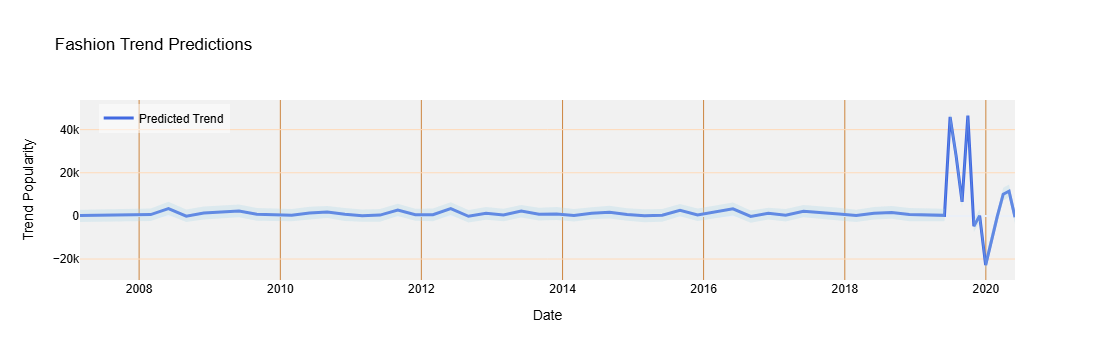

Popular Article Types and Colors:
       articleType baseColour  count
1762       Tshirts      White   1119
1730       Tshirts      Black   1049
1731       Tshirts       Blue   1045
1842       Watches      Black    987
1484  Sports Shoes      White    898
246   Casual Shoes      Black    875
1347        Shirts       Blue    785
1739       Tshirts       Grey    628
1756       Tshirts        Red    602
1738       Tshirts      Green    591


In [27]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from collections import Counter
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go

# Step 1: Load the dataset
df = pd.read_csv('style.csv')  # Replace with your dataset path
df = df.drop(columns=['Unnamed: 10', 'Unnamed: 11'])

# Handle missing values in productDisplayName
df = df.dropna(subset=['productDisplayName'])

# Step 2: Handle missing values in the 'year' column
# Check for missing values
print("Missing values in 'year' column:", df['year'].isnull().sum())

# Drop rows with missing 'year' values
df = df.dropna(subset=['year'])

# Convert 'year' to integer
df['year'] = df['year'].astype(int)

# Display the first few rows
print(df.head())

# Step 3: Text Analysis (NLP)
def analyze_product_names(df):
    all_words = []
    for name in df['productDisplayName']:
        if isinstance(name, str):  # Ensure the value is a string
            blob = TextBlob(name)
            all_words.extend(blob.words)
    
    stopwords = ['the', 'and', 'of', 'in', 'to', 'for', 'Men', 'Women']
    filtered_words = [word for word in all_words if word.lower() not in stopwords]
    word_freq = Counter(filtered_words)
    return word_freq.most_common(10)

trending_keywords = analyze_product_names(df)
print("Trending Keywords:", trending_keywords)

# Step 4: Trend Prediction
def predict_trends(df):
    # Map seasons to months
    season_to_month = {
        'Spring': 3,  # March
        'Summer': 6,  # June
        'Fall': 9,    # September
        'Winter': 12  # December
    }
    df['month'] = df['season'].map(season_to_month)
    
    # Check for missing or invalid values in 'month'
    print("Missing values in 'month' column:", df['month'].isnull().sum())
    print("Unique values in 'month' column:", df['month'].unique())
    
    # Drop rows with missing 'month' values (if any)
    df = df.dropna(subset=['month'])
    
    # Convert 'month' to integer
    df['month'] = df['month'].astype(int)
    
    # Debug: Print the first few rows of the 'year' and 'month' columns
    print("First few rows of 'year' and 'month':")
    print(df[['year', 'month']].head())
    
    # Create a proper datetime column
    df['ds'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01', format='%Y-%m-%d')
    
    # Debug: Print the first few rows of the 'ds' column
    print("First few rows of 'ds':")
    print(df['ds'].head())
    
    # Group by datetime and count occurrences
    trend_data = df.groupby('ds').size().reset_index(name='y')
    
    # Fit Prophet model
    model = Prophet()
    model.fit(trend_data)
    
    # Make future predictions
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)
    return forecast

forecast = predict_trends(df)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Step 5: Visualization with Plotly
def visualize_trends(forecast):
    # Create a Plotly figure
    fig = go.Figure()

    # Add the predicted trend line
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat'],
        mode='lines',
        name='Predicted Trend',
        line=dict(color='royalblue', width=3),
        hovertemplate='<b>Date</b>: %{x}<br><b>Trend Popularity</b>: %{y}<extra></extra>'
    ))

    # Add the uncertainty interval (shaded region)
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat_upper'],
        mode='lines',
        line=dict(width=0),
        showlegend=False,
        hoverinfo='skip'
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat_lower'],
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(173, 216, 230, 0.3)',
        fill='tonexty',
        showlegend=False,
        hoverinfo='skip'
    ))

    # Update layout for a trendy look
    fig.update_layout(
        title='Fashion Trend Predictions',
        xaxis_title='Date',
        yaxis_title='Trend Popularity',
        template='plotly_white',
        hovermode='x unified',
        font=dict(family='Arial', size=12, color='black'),
        plot_bgcolor='rgba(240, 240, 240, 0.9)',
        paper_bgcolor='rgba(255, 255, 255, 0.9)',
        xaxis=dict(showgrid=True, gridcolor='peru'),
        yaxis=dict(showgrid=True, gridcolor='peachpuff'),
        legend=dict(x=0.02, y=0.98, bgcolor='rgba(255, 255, 255, 0.5)')
    )

    # Add hover effects
    fig.update_traces(
        hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial')
    )

    # Show the figure
    fig.show()

visualize_trends(forecast)

# Step 6: Analyze Article Types and Colors
def analyze_article_colors(df):
    article_color_counts = df.groupby(['articleType', 'baseColour']).size().reset_index(name='count')
    article_color_counts = article_color_counts.sort_values(by='count', ascending=False)
    return article_color_counts.head(10)

popular_article_colors = analyze_article_colors(df)
print("Popular Article Types and Colors:")
print(popular_article_colors)